# Sentiment Classification 

**Note:** This classification was originally done by Andrew Trask but I've modified it a bit to further check the 
dataset and I've attempt to find optimal parameters for the network; html blocks for further explaination has also been added.

# Curating the Dataset<a id='lesson_1'></a>

Here is a set of 25,000 IMDB movie reviews and their associated labels('POSITIVE' and 'NEGATIVE').

In [ ]:
def print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') 
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') 
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` has already been preprocessed a bit and contains only lower case characters.

In [60]:
len(reviews)

25000

Below is an example of a review('reviews[0]') and its associated label('labels[0]'). 

In [61]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [62]:
labels[0]

'POSITIVE'

# Developing a Predictive Theory<a id='lesson_2'></a>

In [63]:
print("labels.txt \t : \t reviews.txt\n")
print_review_and_label(2137)
print_review_and_label(12816)
print_review_and_label(6267)
print_review_and_label(21934)
print_review_and_label(5297)
print_review_and_label(4998)
print_review_and_label(10788)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...
POSITIVE	:	girlfight is using a well  known formula as someone pointed out  however  i have...


In the code cell above is 7 randomly chosen reviews and their associated labels. I can already see some trends in the reviews that may be a good starting point for predicting the labels. Words like terrible being associated with a negative label and excellent being associated with a positive label seems like there could be a good correlation here; I'll investigate further using words as our vectors.

**NOTE:** The reason I'm using words is because I'm looking for some kind of human metric to base this correlation off of. Using individual letters or the entire review just doesn't feel right from a human perspective. Individual letters wouldn't indicate to me if the review is positive or negative, and basing it off of entire reviews doesn't seem like there would be good correlation either since each review would likely be a little different since people are different.

# Quick Theory Validation<a id='project_1'></a>

In [64]:
from collections import Counter
import numpy as np

I've created three `Counter` objects: one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [65]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [67]:
# Looping over all the words in the reviews and increasing their count for their associated label and the total word count
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [68]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 920342),
 ('the', 289798),
 ('.', 266379),
 ('and', 150140),
 ('a', 139721),
 ('of', 128829),
 ('to', 111580),
 ('is', 95544),
 ('in', 84175),
 ('br', 82202),
 ('it', 80190),
 ('i', 67864),
 ('that', 59570),
 ('this', 58666),
 ('s', 56407),
 ('as', 43963),
 ('with', 38946),
 ('for', 37614),
 ('was', 36713),
 ('film', 35021),
 ('but', 34699),
 ('movie', 31598),
 ('his', 28668),
 ('on', 28369),
 ('you', 27588),
 ('he', 27171),
 ('are', 24739),
 ('not', 23810),
 ('t', 22920),
 ('one', 22855),
 ('have', 21102),
 ('be', 20808),
 ('by', 20112),
 ('all', 19980),
 ('who', 19233),
 ('an', 18804),
 ('at', 18734),
 ('from', 18041),
 ('her', 18003),
 ('they', 16603),
 ('has', 15399),
 ('so', 15265),
 ('like', 15062),
 ('very', 13859),
 ('about', 13855),
 ('out', 13584),
 ('there', 13462),
 ('she', 13384),
 ('or', 12854),
 ('what', 12851),
 ('good', 12803),
 ('more', 12571),
 ('some', 12451),
 ('when', 12431),
 ('if', 12134),
 ('just', 11944),
 ('can', 11663),
 ('story', 11407),
 ('time', 108

In [69]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 937622),
 ('.', 280352),
 ('the', 272575),
 ('a', 132382),
 ('and', 124462),
 ('of', 115520),
 ('to', 115455),
 ('br', 87516),
 ('is', 83801),
 ('it', 80835),
 ('i', 78484),
 ('in', 73179),
 ('this', 68489),
 ('that', 62886),
 ('s', 52683),
 ('was', 43957),
 ('movie', 41585),
 ('for', 36588),
 ('but', 36443),
 ('with', 34898),
 ('as', 34563),
 ('t', 33940),
 ('film', 31932),
 ('you', 29386),
 ('on', 28733),
 ('not', 27469),
 ('have', 25417),
 ('are', 24546),
 ('be', 24400),
 ('he', 23278),
 ('one', 21940),
 ('they', 21757),
 ('at', 20558),
 ('his', 20373),
 ('all', 20161),
 ('so', 19232),
 ('like', 18839),
 ('there', 17957),
 ('just', 17783),
 ('by', 17637),
 ('or', 17247),
 ('an', 17219),
 ('who', 16642),
 ('from', 16229),
 ('if', 16028),
 ('about', 15128),
 ('out', 14955),
 ('what', 14145),
 ('some', 13932),
 ('no', 13612),
 ('her', 13266),
 ('can', 12827),
 ('even', 12736),
 ('has', 12707),
 ('good', 12406),
 ('bad', 12280),
 ('would', 11836),
 ('up', 11585),
 ('only', 11364),

As we can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, I'll look for the words found in positive reviews more often than in negative reviews and vice versa(I'll use a simple positive to negative ratio for this).

In [70]:
pos_neg_ratios = Counter()

# Consider words to be "common" if they've been used at least 100 times
# The word count can be modified if wanted/needed for better results
for term,cnt in list(total_counts.most_common()):
    if(cnt > 150):
        # The +1 in the denominator ensures there's no division by 0 in case a word only shows in positive reviews
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

I'll examine the ratios calculated for a few words:

In [71]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.063182378492604
Pos-to-neg ratio for 'amazing' = 3.8377777777777777
Pos-to-neg ratio for 'terrible' = 0.17949808592088473


Looking closely at the values calculated, we see the following: 

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` added to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later I'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative ratios of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value for neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, I'll convert all the ratios to new values using logarithms so that positive and negative words will have similar magnitude but opposite signs.

In [72]:
# Convert ratios to logs
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

Examine the new ratios calculated for the same words as before:

In [73]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.06126665425077051
Pos-to-neg ratio for 'amazing' = 1.344893495382313
Pos-to-neg ratio for 'terrible' = -1.7175907345040577


Now I see neutral words with values close to zero, positive words with values above 1, and negative words with values below -1. I'll use these new ratios to see the new most common words.

In [74]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 5.3706380281276624),
 ('antwone', 5.1704839950381514),
 ('din', 5.0937502008067623),
 ('felix', 3.3542804618744038),
 ('kolchak', 3.2188758248682006),
 ('vance', 3.0647251450409425),
 ('victoria', 2.9165949529952671),
 ('polanski', 2.8802193864321466),
 ('matthau', 2.8550323914508557),
 ('mildred', 2.731580698512404),
 ('rukh', 2.6519607344511664),
 ('fuller', 2.5389738710582761),
 ('peters', 2.498699971920336),
 ('christy', 2.4849066497880004),
 ('flawless', 2.4796847058068487),
 ('wang', 2.3766930651477676),
 ('bourne', 2.2995501892988917),
 ('raines', 2.2547944291576973),
 ('perfection', 2.2490008468599392),
 ('superbly', 2.1972245773362196),
 ('lemmon', 2.1795250002368185),
 ('astaire', 2.1764338076671454),
 ('captures', 2.1171818696626832),
 ('darren', 2.0940403411009885),
 ('macarthur', 2.0794415416798357),
 ('widmark', 2.0636931847116968),
 ('montana', 2.0614230361771577),
 ('elvira', 2.0343211063993665),
 ('wonderfully', 2.0293810397229177),
 ('lily', 2.02717311313407

In [75]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -5.4467373716663099),
 ('uwe', -5.0562458053483077),
 ('seagal', -3.5788785588996079),
 ('unwatchable', -3.2302395835185158),
 ('stinker', -3.1660776393012302),
 ('mst', -2.9211434165629182),
 ('incoherent', -2.8949907037524594),
 ('horrid', -2.6499864001474491),
 ('waste', -2.6487107613159013),
 ('unfunny', -2.5894603884758864),
 ('pointless', -2.5303083055672801),
 ('blah', -2.4720032449520923),
 ('atrocious', -2.3908777001397241),
 ('redeeming', -2.3783634018811246),
 ('worst', -2.2989376725370021),
 ('uninspired', -2.292002983663509),
 ('lousy', -2.276534415794103),
 ('drivel', -2.2512917986064953),
 ('laughable', -2.2512917986064953),
 ('poorly', -2.2121781270032774),
 ('awful', -2.1987612660750351),
 ('tooth', -2.1473922035883439),
 ('miserably', -2.1129642337184795),
 ('remotely', -2.1012605890744758),
 ('embarrassment', -2.0932348638121718),
 ('wasting', -2.0840604875361306),
 ('crocodile', -2.0605135317943173),
 ('cannibal', -2.044102175234527),
 ('boredom', -2.03377

**NOTE:** The words appearing in these most_common lists are words which have come up more than 150 times with their respective labels. The reason for choosing 150 is because choosing a lower amount like 100 would have too many names in the top 10 spots on the list, and as you can see there's still some names appearing on the positive list.

# Transforming Text into Numbers<a id='lesson_3'></a>

Below is the part of the network that will take the reviews, extract the words from the reviews, counts these words, and puts the counts into a vector for further analysis.

Two example diagrams are given for a POSITIVE and NEGATIVE prediction based on the word input that was counted.

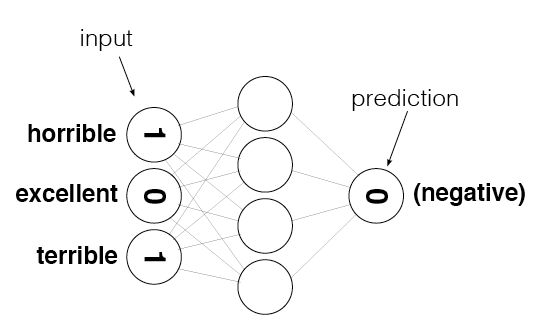

In [76]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

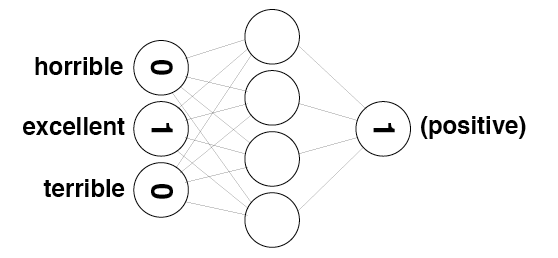

In [77]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Creating the Input/Output Data<a id='project_2'></a>


In [78]:
vocab = set(total_counts.keys())

Here is a check for the vocabulary size, which should be **74074** if nothing went wrong.

In [79]:
vocab_size = len(vocab)
print(vocab_size)

74074


I'll be using only 1 hidden layer for the N.N. Layer 0 will be for the inputs, layer 1 will be the hidden layer, and layer 2 will be the prediction. An example diagram is shown below.

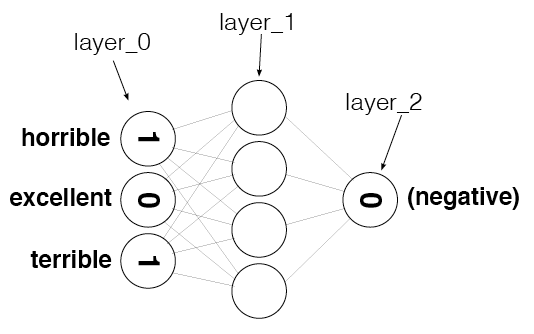

In [80]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

In [81]:
#layer_0 will be initialized to all zeros since this is our starting point
#layer_0 will be a 2-dimensional matrix with 1 row and vocab_size columns
layer_0 = np.zeros((1,vocab_size))

In [82]:
#layer_0.shape should display (1, 74074) since there's 1 row containing all of the vocab
layer_0.shape

(1, 74074)

I'll need a check for the index of each word since this will be useful later on in the analysis.

In [83]:
# Creating a dictionary of words in the vocab mapped to index positions(to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# Display the map of words to indices
word2index

{'': 0,
 'resettled': 1,
 'drumbeat': 2,
 'syriana': 3,
 'windbreaker': 4,
 'bobs': 5,
 'inxs': 6,
 'ronald': 7,
 'stockard': 8,
 'coos': 9,
 'prefix': 10,
 'bambino': 11,
 'quivvles': 12,
 'socking': 13,
 'overexciting': 14,
 'frenais': 15,
 'munchausen': 16,
 'crucible': 17,
 'panzram': 18,
 'maratama': 19,
 'stooped': 20,
 'lycanthropic': 21,
 'dooohhh': 22,
 'interlopers': 23,
 'paquin': 24,
 'occidental': 25,
 'swansong': 26,
 'weihenmayer': 27,
 'african': 28,
 'fogey': 29,
 'frontman': 30,
 'olympiad': 31,
 'skye': 32,
 'heslov': 33,
 'shipping': 34,
 'trudge': 35,
 'exploited': 36,
 'holds': 37,
 'obliges': 38,
 'truck': 39,
 'quarters': 40,
 'antiquity': 41,
 'would': 42,
 'adorble': 43,
 'landor': 44,
 'unionist': 45,
 'contempt': 46,
 'scaryt': 47,
 'foal': 48,
 'unfortunates': 49,
 'xxth': 50,
 'moore': 51,
 'mysterio': 52,
 'dweezil': 53,
 'hobgobblins': 54,
 'alterations': 55,
 'intention': 56,
 'goodwill': 57,
 'pulsing': 58,
 'subsp': 59,
 'tropa': 60,
 'shot': 61,
 'ta

Here's the implementation of `update_input_layer`. It should count how many times each word is used in the given review, and then store those counts at the appropriate indices inside `layer_0`.

In [84]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
     
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    
    # count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

Now I'll run a small test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully I'll see some non-zero values in `layer_0`.  

In [85]:
update_input_layer(reviews[0])
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

Here's the implementation of `get_target_for_labels`. It should return `0` or `1`, depending on whether the given label is `NEGATIVE` or `POSITIVE'.

In [86]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

Another small test, the label and target should print out`'POSITIVE'` and `1`.

In [87]:
labels[0]

'POSITIVE'

In [88]:
get_target_for_label(labels[0])

1

And this label and target should print out `'NEGATIVE'` and `0`.

In [89]:
labels[1]

'NEGATIVE'

In [90]:
get_target_for_label(labels[1])

0

# Building a Neural Network<a id='project_3'></a>

The goals for this N.N. are:
- Create a basic neural network with an input layer, hidden layer, and an output layer. 
- Make sure **not** to add a non-linearity in the hidden layer.
- Re-use the code from earlier in this notebook to create the training data.
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

In [42]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Creating a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to the random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # Process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words so a value can be assigned to each word, and create a
        # single output node to predict the sentiment
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # Populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # Populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a 2-dimensional matrix with shape 1 x input_nodes(the length of the vocab list)
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review):

        # Clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # Ensure the word is actually a key in word2index before
            # accessing it, which is important because accessing an invalid key
            # with raise an exception in Python. This allows us to ignore unknown
            # words encountered in new reviews.
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    # Sigmoid for giving an output of 1 or 0
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # Backpropagating the sigmoid
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # Make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # Keep track of how many correct predictions 
        correct = 0

        # Time how many predictions per second
        start = time.time()

        # Loop through each of the given reviews and call run to predict its label
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # Return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

I'll create a `SentimentNetwork` that trains on all but the last 1000 reviews (save those for testing). I'll try a learning rate of `0.1`.

In [43]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Now I'll run the following test to check the network's performance against the last 1000 reviews(the one's held out from above).

**The model has not been trained yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [44]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):187.4 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

Time to train the network. During training, it will display the model's accuracy repeatedly as it trains so we can see how well it's doing.

In [45]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):36.48 #Correct:1251 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):36.79 #Correct:2501 #Trained:5001 Training Accuracy:50.0%
Progress:31.2% Speed(reviews/sec):36.68 #Correct:3751 #Trained:7501 Training Accuracy:50.0%
Progress:41.6% Speed(reviews/sec):36.71 #Correct:5001 #Trained:10001 Training Accuracy:50.0%
Progress:52.0% Speed(reviews/sec):36.54 #Correct:6251 #Trained:12501 Training Accuracy:50.0%
Progress:62.5% Speed(reviews/sec):36.49 #Correct:7501 #Trained:15001 Training Accuracy:50.0%
Progress:72.9% Speed(reviews/sec):36.49 #Correct:8751 #Trained:17501 Training Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):36.48 #Correct:10001 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):36.46 #Correct:11251 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):36.42 #Correct:12000 #Trained:24000 Training Ac

Accuracy of 50.0%, most likely because the learning rate is too high. I'll recreate the network and this time set the learning rate to 0.01, this is generally a good starting point since the steps are smaller and there's a more gradual climb down for the gradient descent.

In [46]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):37.16 #Correct:1248 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):36.44 #Correct:2498 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):36.34 #Correct:3748 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):36.51 #Correct:4998 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):36.24 #Correct:6248 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):36.16 #Correct:7491 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):36.09 #Correct:8744 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):36.08 #Correct:9994 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):36.06 #Correct:11256 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):36.04 #Correct:12005 #Trained:24000 Training Acc

Accuracy still about 50%, I'll try one more time to reduce the learning rate, to '0.001' this time. This should get somewhere since these are extremely small steps.

In [47]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):37.43 #Correct:1259 #Trained:2501 Training Accuracy:50.3%
Progress:20.8% Speed(reviews/sec):37.22 #Correct:2641 #Trained:5001 Training Accuracy:52.8%
Progress:31.2% Speed(reviews/sec):36.59 #Correct:4055 #Trained:7501 Training Accuracy:54.0%
Progress:41.6% Speed(reviews/sec):36.38 #Correct:5582 #Trained:10001 Training Accuracy:55.8%
Progress:52.0% Speed(reviews/sec):35.89 #Correct:7088 #Trained:12501 Training Accuracy:56.6%
Progress:62.5% Speed(reviews/sec):34.94 #Correct:8633 #Trained:15001 Training Accuracy:57.5%
Progress:72.9% Speed(reviews/sec):33.89 #Correct:10230 #Trained:17501 Training Accuracy:58.4%
Progress:83.3% Speed(reviews/sec):33.47 #Correct:11938 #Trained:20001 Training Accuracy:59.6%
Progress:93.7% Speed(reviews/sec):33.09 #Correct:13604 #Trained:22501 Training Accuracy:60.4%
Progress:99.9% Speed(reviews/sec):32.61 #Correct:14664 #Trained:24000 Training A

Well, the accuracy has gone up, about 61% this time, which is better than 50%, but a human could probably do much better, so I'll look to optimize elsewhere now.

# Understanding Neural Noise<a id='lesson_4'></a>

Earlier when I was running the update to the inputs I came across this small test that produced these results: 

In [48]:
update_input_layer(reviews[0])
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

As we can see, the weight of the first input is really high, an 18, while the other inputs are all 0. This 18 will have a dominant influence on the nextwork going forward. Let's take a look and see what this 18 represents.

In [49]:
list(vocab)

['',
 'resettled',
 'drumbeat',
 'syriana',
 'windbreaker',
 'bobs',
 'inxs',
 'ronald',
 'stockard',
 'coos',
 'prefix',
 'bambino',
 'quivvles',
 'socking',
 'overexciting',
 'frenais',
 'munchausen',
 'crucible',
 'panzram',
 'maratama',
 'stooped',
 'lycanthropic',
 'dooohhh',
 'interlopers',
 'paquin',
 'occidental',
 'swansong',
 'weihenmayer',
 'african',
 'fogey',
 'frontman',
 'olympiad',
 'skye',
 'heslov',
 'shipping',
 'trudge',
 'exploited',
 'holds',
 'obliges',
 'truck',
 'quarters',
 'antiquity',
 'would',
 'adorble',
 'landor',
 'unionist',
 'contempt',
 'scaryt',
 'foal',
 'unfortunates',
 'xxth',
 'moore',
 'mysterio',
 'dweezil',
 'hobgobblins',
 'alterations',
 'intention',
 'goodwill',
 'pulsing',
 'subsp',
 'tropa',
 'shot',
 'takahisa',
 'shikhar',
 'faudel',
 'margarete',
 'slots',
 'motorhead',
 'italianness',
 'siberiade',
 'crowded',
 'enact',
 'teeeell',
 'cebuano',
 'carve',
 'disinterred',
 'intruder',
 'musclehead',
 'unisex',
 'sickens',
 'robertsons',


The large weight of 18 represents nothing! This is like the diagram below, imagine horrible had a weight of 18, then it would be largely influential in the outcome. Time to check what other irrelavant words could be wrongly influencing the N.N.

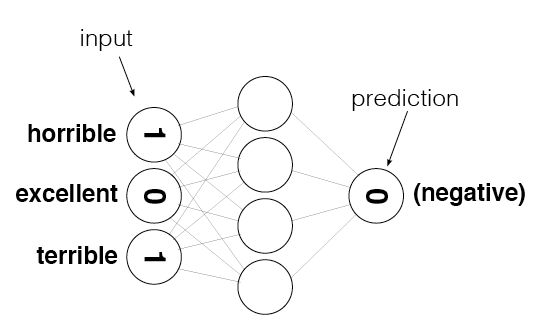

In [50]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [55]:
review_counter = Counter()

In [56]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [57]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('a', 4),
 ('teachers', 4),
 ('that', 4),
 ('of', 4),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('me', 2),
 ('students', 2),
 ('their', 2),
 ('student', 2),
 ('cartoon', 1),
 ('comedy', 1),
 ('ran', 1),
 ('same', 1),
 ('time', 1),
 ('some', 1),
 ('other', 1),
 ('programs', 1),
 ('about', 1),
 ('life', 1),
 ('such', 1),
 ('years', 1),
 ('teaching', 1),
 ('profession', 1),
 ('lead', 1),
 ('believe', 1),
 ('s', 1),
 ('satire', 1),
 ('much', 1),
 ('closer', 1),
 ('reality', 1),
 ('than', 1),
 ('scramble', 1),
 ('survive', 1),
 ('financially', 1),
 ('insightful', 1),
 ('who', 1),
 ('can', 1),
 ('see', 1),
 ('right', 1),
 ('through', 1),
 ('pathetic', 1),
 ('pomp', 1),
 ('pettiness', 1),
 ('whole', 1),
 ('situation', 1),
 ('all', 1),
 ('remind', 1),
 ('schools', 1),
 ('knew', 1),
 ('and', 1),
 ('when', 1),
 ('saw', 1),
 ('episode', 1),
 ('which', 1),
 ('r

Wow! The most impactful words have nothing to do with what we're looking for. Such as a period, "the","to", etc.
I'll filter these words out to reduce the noise in the input data and then retrain the N.N.

# Reducing Noise in Our Input Data<a id='project_4'></a> 

The following code is the same as the previous SentimentNetwork code from above.

In [91]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # Process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # Populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # Populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # Clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # Ensure the word is actually a key in word2index before
            # accessing it, which is important because accessing an invalid key
            # with raise an exception in Python. This allows us to ignore unknown
            # words encountered in new reviews
            if(word in self.word2index.keys()):
################################# CHANGED TO SET TO 1 INSTEAD OF ADD 1 #################################
                self.layer_0[0][self.word2index[word]] = 1 # this will make the words unbiased so no more 18 weight for nothing
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # Make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]

            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # Keep track of how many correct predictions 
        correct = 0

        # Time how many predictions per second
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out prediction accuracy and speed 
            # throughout the prediction process 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # Return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

I'll recreate the network and train it using a learning rate of `0.1`.

In [92]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):25.97 #Correct:1821 #Trained:2501 Training Accuracy:72.8%
Progress:20.8% Speed(reviews/sec):26.12 #Correct:3825 #Trained:5001 Training Accuracy:76.4%
Progress:31.2% Speed(reviews/sec):26.35 #Correct:5915 #Trained:7501 Training Accuracy:78.8%
Progress:41.6% Speed(reviews/sec):26.30 #Correct:8060 #Trained:10001 Training Accuracy:80.5%
Progress:52.0% Speed(reviews/sec):26.40 #Correct:10200 #Trained:12501 Training Accuracy:81.5%
Progress:62.5% Speed(reviews/sec):26.37 #Correct:12323 #Trained:15001 Training Accuracy:82.1%
Progress:72.9% Speed(reviews/sec):26.34 #Correct:14433 #Trained:17501 Training Accuracy:82.4%
Progress:83.3% Speed(reviews/sec):26.36 #Correct:16612 #Trained:20001 Training Accuracy:83.0%
Progress:93.7% Speed(reviews/sec):26.51 #Correct:18784 #Trained:22501 Training Accuracy:83.4%
Progress:99.9% Speed(reviews/sec):26.60 #Correct:20107 #Trained:24000 Training

In [94]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):191.1 #Correct:856 #Tested:1000 Testing Accuracy:85.6%

Now we see a training accuracy of 83.7% with a testing accuracy of 85.6%, and this is with a learning rate of 0.1! The rate will most likely be even higher if the learning rate were an order of magnitude lower. I'll implement this later on after dealing with some more inefficiencies.

# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>

If I look at what's going on with the weights I can see that for a lot of the input there are 0's, which means many of the weights are multiplied and then added with a 0, which is a huge waste of time and resources since there's 74074 words and majority will be 0 for each calculation.

A second obvious inefficiency is with the multiplication by 1 for the input nodes that are activated. Since 1 times anything is itself, I should be able to skip this step altogether while retaining the same values.

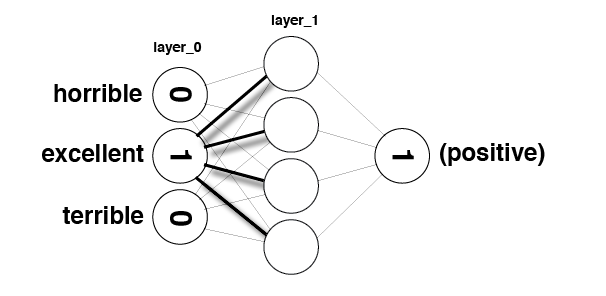

In [95]:
Image(filename='sentiment_network_sparse.png')

# Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. Steps to take:
* Remove the `update_input_layer` function - it's not needed here.
* Modify `init_network`:
>* No longer need a separate input layer, so remove all `self.layer_0`
>* Will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, preprocess the reviews to convert them to a list of indices (from `word2index`) that are actually used in the review, this is equivalent to setting specific indices to 1. 
>* Create a local `list` variable named `training_reviews` that contains a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like what was done in `train`, pre-process the `review` to work with word indices, then update `layer_1` by adding weights for the indices used in the review.

The following code is the same as the previous SentimentNetwork with the exception of the above modifications.

In [96]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # Process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # Populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so I can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        ##### Removed: self.layer_0; added self.layer_1 #####
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1 = np.zeros((1,hidden_nodes))
    
    ##### Removed: update_input_layer function #####
    
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    ##### Changed: name of first parameter from 'training_reviews' #####
    #                     to 'training_reviews_raw'
    def train(self, training_reviews_raw, training_labels):

        ##### Pre-process training reviews to deal directly with the indices of non-zero inputs #####
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        # Make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            ### Forward pass ###

            ##### Removed: call to 'update_input_layer' function because 'layer_0' is no longer used #####

            # Hidden layer
            ##### Add: in only the weights for non-zero items #####
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]

            # Output layer
            ##### Changed: to use 'self.layer_1' instead of 'local layer_1' #####
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))            

            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            ##### Changed: to use 'self.layer_1' instead of local 'layer_1' #####
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            ##### Update: only the weights that were used in the forward pass #####
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # Keep track of how many correct predictions
        correct = 0

        # Predictions per second 
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        ##### Removed: call to update_input_layer function because layer_0 is no longer used #####

        # Hidden layer
        ##### Identify: the indices used in the review and then add just those weights to layer_1 #####
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        ##### Changed: to use self.layer_1 instead of local layer_1 #####
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # Return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


Once again I'll recreate the network and train it with a learning rate of 0.1.

In [97]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):304.0 #Correct:1819 #Trained:2501 Training Accuracy:72.7%
Progress:20.8% Speed(reviews/sec):279.9 #Correct:3815 #Trained:5001 Training Accuracy:76.2%
Progress:31.2% Speed(reviews/sec):262.3 #Correct:5911 #Trained:7501 Training Accuracy:78.8%
Progress:41.6% Speed(reviews/sec):255.2 #Correct:8055 #Trained:10001 Training Accuracy:80.5%
Progress:52.0% Speed(reviews/sec):257.3 #Correct:10188 #Trained:12501 Training Accuracy:81.4%
Progress:62.5% Speed(reviews/sec):254.8 #Correct:12327 #Trained:15001 Training Accuracy:82.1%
Progress:72.9% Speed(reviews/sec):257.9 #Correct:14453 #Trained:17501 Training Accuracy:82.5%
Progress:83.3% Speed(reviews/sec):255.9 #Correct:16632 #Trained:20001 Training Accuracy:83.1%
Progress:93.7% Speed(reviews/sec):256.1 #Correct:18812 #Trained:22501 Training Accuracy:83.6%
Progress:99.9% Speed(reviews/sec):256.0 #Correct:20137 #Trained:24000 Training

In [98]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):439.4 #Correct:854 #Tested:1000 Testing Accuracy:85.4%

That was a significant speed increase. The reviews/sec increased by a factor of 10 - 12 while training and doubled while testing. This means the same amount of work was done in 1/10th of the time! 

# Further Noise Reduction<a id='lesson_6'></a>

Earlier I looked at the frequency of words appearing in the positive and negative reviews. This can be used as an advantage
since words appearing closer to 0 won't be good indicators for weather or not the label should be POSITIVE or NEGATIVE. So I'll make an adjustment to only include words that aren't clustered around the middle of the word distribution. So let's take a look at the word distribution and see where the cutoff points should be.

In [99]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 5.3706380281276624),
 ('antwone', 5.1704839950381514),
 ('din', 5.0937502008067623),
 ('felix', 3.3542804618744038),
 ('kolchak', 3.2188758248682006),
 ('vance', 3.0647251450409425),
 ('victoria', 2.9165949529952671),
 ('polanski', 2.8802193864321466),
 ('matthau', 2.8550323914508557),
 ('mildred', 2.731580698512404),
 ('rukh', 2.6519607344511664),
 ('fuller', 2.5389738710582761),
 ('peters', 2.498699971920336),
 ('christy', 2.4849066497880004),
 ('flawless', 2.4796847058068487),
 ('wang', 2.3766930651477676),
 ('bourne', 2.2995501892988917),
 ('raines', 2.2547944291576973),
 ('perfection', 2.2490008468599392),
 ('superbly', 2.1972245773362196),
 ('lemmon', 2.1795250002368185),
 ('astaire', 2.1764338076671454),
 ('captures', 2.1171818696626832),
 ('darren', 2.0940403411009885),
 ('macarthur', 2.0794415416798357),
 ('widmark', 2.0636931847116968),
 ('montana', 2.0614230361771577),
 ('elvira', 2.0343211063993665),
 ('wonderfully', 2.0293810397229177),
 ('lily', 2.02717311313407

In [100]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -5.4467373716663099),
 ('uwe', -5.0562458053483077),
 ('seagal', -3.5788785588996079),
 ('unwatchable', -3.2302395835185158),
 ('stinker', -3.1660776393012302),
 ('mst', -2.9211434165629182),
 ('incoherent', -2.8949907037524594),
 ('horrid', -2.6499864001474491),
 ('waste', -2.6487107613159013),
 ('unfunny', -2.5894603884758864),
 ('pointless', -2.5303083055672801),
 ('blah', -2.4720032449520923),
 ('atrocious', -2.3908777001397241),
 ('redeeming', -2.3783634018811246),
 ('worst', -2.2989376725370021),
 ('uninspired', -2.292002983663509),
 ('lousy', -2.276534415794103),
 ('drivel', -2.2512917986064953),
 ('laughable', -2.2512917986064953),
 ('poorly', -2.2121781270032774),
 ('awful', -2.1987612660750351),
 ('tooth', -2.1473922035883439),
 ('miserably', -2.1129642337184795),
 ('remotely', -2.1012605890744758),
 ('embarrassment', -2.0932348638121718),
 ('wasting', -2.0840604875361306),
 ('crocodile', -2.0605135317943173),
 ('cannibal', -2.044102175234527),
 ('boredom', -2.03377

In [101]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [102]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

Well, there it is in the distribution. There's a lot of noise clustered around the middle that doesn't say a lot about the sentiment. 

# Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. 
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews.

>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`

* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when calling `pre_process_data`

The following code is the same as the previous SentimentNetwork, with the exception of the above modifications.

In [105]:
import time
import sys
import numpy as np

class SentimentNetwork:
    ##### Added: min_count and polarity_cutoff parameters #####
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            min_count(int) - Words should only be added to the vocabulary 
                             if they occur more than this many times
            polarity_cutoff(float) - The absolute value of a word's positive-to-negative
                                     ratio must be at least this big to be considered.
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # Process the reviews and their associated labels so that everything
        # is ready for training
        ##### Added: min_count and polarity_cutoff arguments to pre_process_data call #####
        self.pre_process_data(reviews, labels, polarity_cutoff, min_count)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    ##### Added: min_count and polarity_cutoff parameters #####
    def pre_process_data(self, reviews, labels, polarity_cutoff, min_count):
        
        ##### Calculate: positive-to-negative ratios for words before building vocabulary #####
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            # Only count words appearing more than 50 times
            if(cnt >= 50):
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))

        # Populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                ##### Add: only words that occur at least min_count times and for words #####
                ##### with pos/neg ratios, only add words that meet the polarity_cutoff #####    
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # Populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the weights between the hidden layer and the output layer
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1 = np.zeros((1,hidden_nodes))
    
    
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews_raw, training_labels):

        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        # Make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            ### Forward pass ###

            # Hidden layer
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]

            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))            
            
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # Keep track of how many correct predictions 
        correct = 0

        # Predictions per second 
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.

        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
         
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # Return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


I'll train the network with a small polarity cutoff of 0.05 and a 0.01 learning rate.

In [111]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):305.5 #Correct:1994 #Trained:2501 Training Accuracy:79.7%
Progress:20.8% Speed(reviews/sec):300.6 #Correct:4063 #Trained:5001 Training Accuracy:81.2%
Progress:31.2% Speed(reviews/sec):293.3 #Correct:6176 #Trained:7501 Training Accuracy:82.3%
Progress:41.6% Speed(reviews/sec):290.7 #Correct:8336 #Trained:10001 Training Accuracy:83.3%
Progress:52.0% Speed(reviews/sec):288.0 #Correct:10501 #Trained:12501 Training Accuracy:84.0%
Progress:62.5% Speed(reviews/sec):286.9 #Correct:12641 #Trained:15001 Training Accuracy:84.2%
Progress:72.9% Speed(reviews/sec):287.0 #Correct:14782 #Trained:17501 Training Accuracy:84.4%
Progress:83.3% Speed(reviews/sec):285.9 #Correct:16954 #Trained:20001 Training Accuracy:84.7%
Progress:93.7% Speed(reviews/sec):286.3 #Correct:19143 #Trained:22501 Training Accuracy:85.0%
Progress:99.9% Speed(reviews/sec):286.2 #Correct:20461 #Trained:24000 Training

Now I'll test the performance.

In [107]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):517.3 #Correct:859 #Tested:1000 Testing Accuracy:85.9%

Train the network with a much larger polarity cutoff, 0.8, and the same learning rate.

In [110]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1325. #Correct:2114 #Trained:2501 Training Accuracy:84.5%
Progress:20.8% Speed(reviews/sec):1232. #Correct:4235 #Trained:5001 Training Accuracy:84.6%
Progress:31.2% Speed(reviews/sec):1209. #Correct:6362 #Trained:7501 Training Accuracy:84.8%
Progress:41.6% Speed(reviews/sec):1250. #Correct:8513 #Trained:10001 Training Accuracy:85.1%
Progress:52.0% Speed(reviews/sec):1280. #Correct:10641 #Trained:12501 Training Accuracy:85.1%
Progress:62.5% Speed(reviews/sec):1215. #Correct:12796 #Trained:15001 Training Accuracy:85.3%
Progress:72.9% Speed(reviews/sec):1153. #Correct:14911 #Trained:17501 Training Accuracy:85.2%
Progress:83.3% Speed(reviews/sec):1123. #Correct:17077 #Trained:20001 Training Accuracy:85.3%
Progress:93.7% Speed(reviews/sec):1089. #Correct:19258 #Trained:22501 Training Accuracy:85.5%
Progress:99.9% Speed(reviews/sec):1099. #Correct:20552 #Trained:24000 Training A

In [109]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1487. #Correct:822 #Tested:1000 Testing Accuracy:82.2%

As we can see, when the polarity is greater there's less data to train on so the reviews/sec are a lot faster, there's around 5 times the speed increase for only about 3% loss in accuracy. If there was a lot more data and I had access to a GPU this tradeoff would most certainly be worth it.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [112]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [113]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):212.1 #Correct:1962 #Trained:2501 Training Accuracy:78.4%
Progress:20.8% Speed(reviews/sec):207.8 #Correct:4002 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):207.8 #Correct:6120 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):210.0 #Correct:8271 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):209.7 #Correct:10431 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):209.7 #Correct:12565 #Trained:15001 Training Accuracy:83.7%
Progress:72.9% Speed(reviews/sec):213.6 #Correct:14670 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):214.5 #Correct:16833 #Trained:20001 Training Accuracy:84.1%
Progress:93.7% Speed(reviews/sec):215.3 #Correct:19015 #Trained:22501 Training Accuracy:84.5%
Progress:99.9% Speed(reviews/sec):216.1 #Correct:20335 #Trained:24000 Training

In [114]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [115]:
get_most_similar_words("excellent")

[('excellent', 0.1367295075735247),
 ('perfect', 0.12548286087225943),
 ('amazing', 0.091827633925999685),
 ('today', 0.090223662694414203),
 ('wonderful', 0.089355976962214589),
 ('fun', 0.08750446667420686),
 ('great', 0.087141758882292031),
 ('best', 0.085810885617880611),
 ('liked', 0.077697629123843426),
 ('definitely', 0.076628781406966009),
 ('brilliant', 0.073423858769279038),
 ('loved', 0.073285428928122134),
 ('favorite', 0.072781136036160751),
 ('superb', 0.07173620717850504),
 ('fantastic', 0.070922191916266197),
 ('job', 0.069160617207634029),
 ('incredible', 0.06642407795261443),
 ('enjoyable', 0.065632560502888806),
 ('rare', 0.064819212662615061),
 ('highly', 0.063889453350970515),
 ('enjoyed', 0.062127546101812946),
 ('wonderfully', 0.062055178604090142),
 ('perfectly', 0.061093208811887401),
 ('fascinating', 0.060663547937493879),
 ('bit', 0.059655427045653062),
 ('gem', 0.059510859296156793),
 ('outstanding', 0.058860808147082999),
 ('beautiful', 0.058613934703162056

In [116]:
get_most_similar_words("terrible")

[('worst', 0.16966107259049851),
 ('awful', 0.12026847019691247),
 ('waste', 0.11945367265311004),
 ('poor', 0.092758887574435511),
 ('terrible', 0.091425387197727942),
 ('dull', 0.084209271678223591),
 ('poorly', 0.081241544516042041),
 ('disappointment', 0.080064759621368733),
 ('fails', 0.078599773723337527),
 ('disappointing', 0.07733948548032335),
 ('boring', 0.077127858748012867),
 ('unfortunately', 0.075502449705859065),
 ('worse', 0.070601835364194676),
 ('mess', 0.070564299623590412),
 ('stupid', 0.069484822832543064),
 ('badly', 0.066888903666228586),
 ('annoying', 0.065687021903374165),
 ('bad', 0.063093814537572152),
 ('save', 0.062880597495865748),
 ('disappointed', 0.062692353812072873),
 ('wasted', 0.061387183028051281),
 ('supposed', 0.060985452957725179),
 ('horrible', 0.060121772339380111),
 ('laughable', 0.058698406285467644),
 ('crap', 0.05810452866788459),
 ('basically', 0.057218840369636148),
 ('nothing', 0.057158220043034211),
 ('ridiculous', 0.056905481068931438

The relation and assignment of the weights to the words has done a great job! It's clear that words predicting positive sentiment have been grouped together and likewise for negative.

In [117]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [118]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")
    

In [119]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [120]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words

The graph shows that the N.N. has clustered similar words together, we can even see what words they are!